In [6]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import gcm

In [7]:
n = 100

In [8]:
index=range(0,n)
columns=['A', 'B', 'C']
df = pd.DataFrame(index=index, columns=columns)

In [9]:
df['A'] = np.random.normal(loc=40,scale=25,size=n)
df['B'] = df['A']*.3 * np.random.normal(loc=1000,scale=250,size=n)
df['C'] = .2 * df['A'] + .5 * df['B']

In [10]:
df.head()

,A,B,C
0,44.259456,7887.763427,3952.733604
1,2.805741,737.241504,369.181900
2,61.161541,11917.437639,5970.951127
3,67.115776,22925.471567,11476.158939
4,76.158997,14282.832611,7156.648105


In [11]:
import dowhy
from dowhy import CausalModel

In [13]:
# I. Create a causal model from the data and given graph.
causal_graph = """
digraph {
A;
B;
C;
A -> C; 
A -> B; 
B -> C;
}


"""

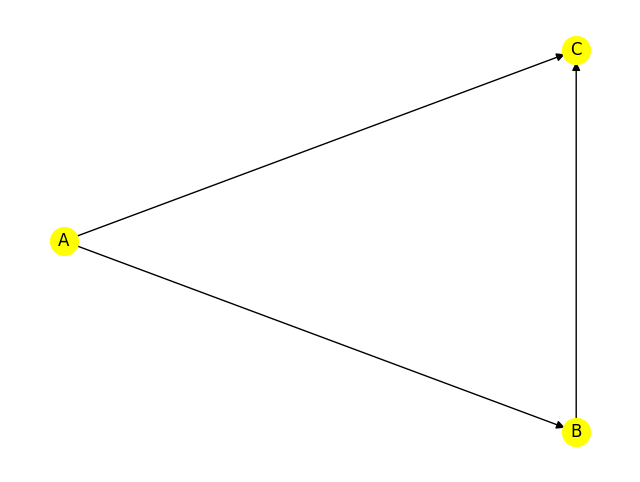

In [16]:
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='A',
        outcome='C')
model.view_model()

In [17]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[C])
d[A]      
Estimand assumption 1, Unconfoundedness: If U→{A} and U→C then P(C|A,,U) = P(C|A,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [20]:
# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,method_name="backdoor.linear_regression",)
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[C])
d[A]      
Estimand assumption 1, Unconfoundedness: If U→{A} and U→C then P(C|A,,U) = P(C|A,)

## Realized estimand
b: C~A
Target units: ate

## Estimate
Mean value: 135.84445591362666



In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
X = df[['B', 'A']]
y = df['C']

reg = LinearRegression().fit(X, y)

In [24]:
reg.score(X, y)

In [25]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
print (reg.intercept_, reg.coef_)

0.0 [0.5 0.2]


In [31]:
np.mean(reg.predict(X))